In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,37208,None,None,85840.764134
2020-06-13,37209,None,None,79751.476151
2020-06-14,37210,None,None,74095.512465
2020-06-15,37211,None,None,68767.698408
2020-06-16,37212,None,None,64021.882023
...,...,...,...,...
2021-03-06,37475,None,None,127147.081534
2021-03-07,37476,None,None,123165.649900
2021-03-08,37477,None,None,119216.808550


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-10_2021-03-10-16-27.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-09_2021-03-09-17-22.pickle


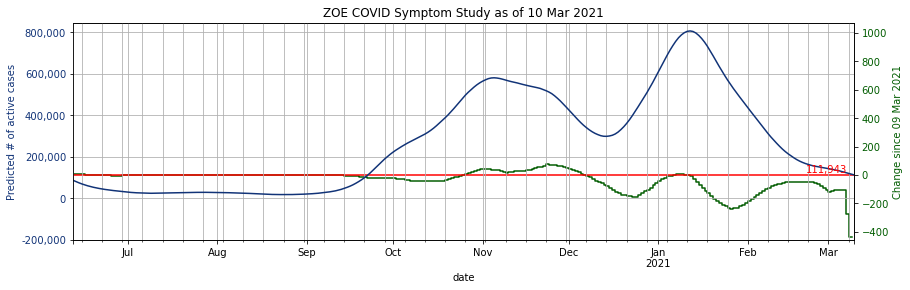

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

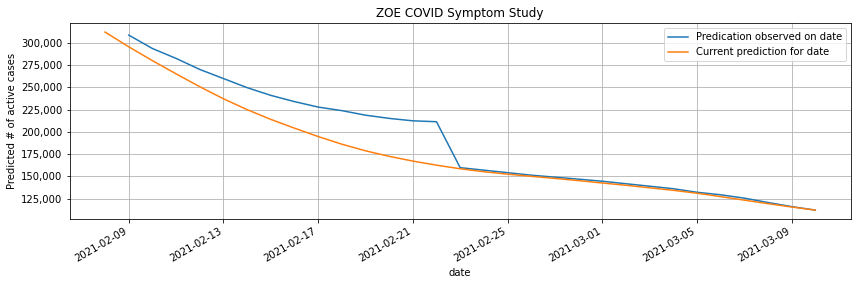

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-10_2021-03-10-16-27.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
247,Nuneaton and Bedworth,E07000219,1.988134
266,Bolton,E08000001,1.051555
237,Rotherham,E08000018,1.000586
184,Cannock Chase,E07000192,0.951929
47,Aylesbury Vale,E07000004,0.798961
193,West Lindsey,E07000142,0.771803
326,Isle of Anglesey,W06000001,0.724430
207,Ashfield,E07000170,0.718980
152,East Lindsey,E07000137,0.706030
294,Walsall,E08000030,0.692058
